# Лабораторная работа №1 Вариант №4

Для набора данных потенциальных покупателей разработать модель для
прогнозирования общей суммы, которую клиенты готовы заплатить за новый
автомобиль. 

Построить регрессионную модель для целевого признака
«Car Purchase Amount» (сумма покупки автомобиля) от остальных входных
признаков.


a. Пункт 5 – GRU рекуррентная сеть
b. Пункт 3.h – Min-max масштабирование

In [1]:
import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

# Ознакомление с набором данных

## Извлекаем датасет, и читаем его

In [86]:
def load_data():
    """Распаковываем датасет, читаем из файла"""
    os.system("!7z x \"./LR1_datasets.rar\" -odatasets -aos")
    ds = pd.read_csv("./datasets/V4.csv", index_col=0)
    return ds

ds = load_data()
ds.describe()


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,244.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.500000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.501028,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,0.500000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## Посмотрим на сырые данные

In [3]:
ds.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0.0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0.0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,NaN,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,NaN,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1.0,57,59729.15130,5358.712177,560304.0671,55915.46248


## Выведем размерность и типы данных в датасете

In [4]:
ds.shape

(500, 9)

In [5]:
ds.dtypes

Customer Name           object
Customer e-mail         object
Country                 object
Gender                 float64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               244 non-null    float64
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 39.1+ KB


## Выведем информацию о данных в текстовых полях

In [7]:
ds["Customer Name"].value_counts()

Customer Name
Seth                    2
Walter                  2
Martina Avila           1
Sexton, Shaeleigh H.    1
Holloway, Brennan Q.    1
                       ..
Holmes Irwin            1
Hector Price            1
Sebastian Marks         1
Marvin Garner           1
Marla                   1
Name: count, Length: 498, dtype: int64

In [8]:
ds["Customer e-mail"].value_counts()

Customer e-mail
cubilia.Curae.Phasellus@quisaccumsanconvallis.edu    1
mi.eleifend.egestas@cursuset.net                     1
ut@Etiamvestibulum.ca                                1
nunc.sed.pede@Quisqueporttitor.net                   1
Cras.eu@vitaevelitegestas.net                        1
                                                    ..
Nunc.sed.orci@Namligulaelit.net                      1
Aliquam.nisl@semegetmassa.co.uk                      1
et.eros@feugiatmetussit.net                          1
in@sed.org                                           1
Camaron.marla@hotmail.com                            1
Name: count, Length: 500, dtype: int64

In [9]:
ds["Country"].value_counts()

Country
USA    500
Name: count, dtype: int64

## Посмотрим статистику по числовым полям

In [87]:
ds.describe()   

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,244.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.500000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.501028,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,0.500000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


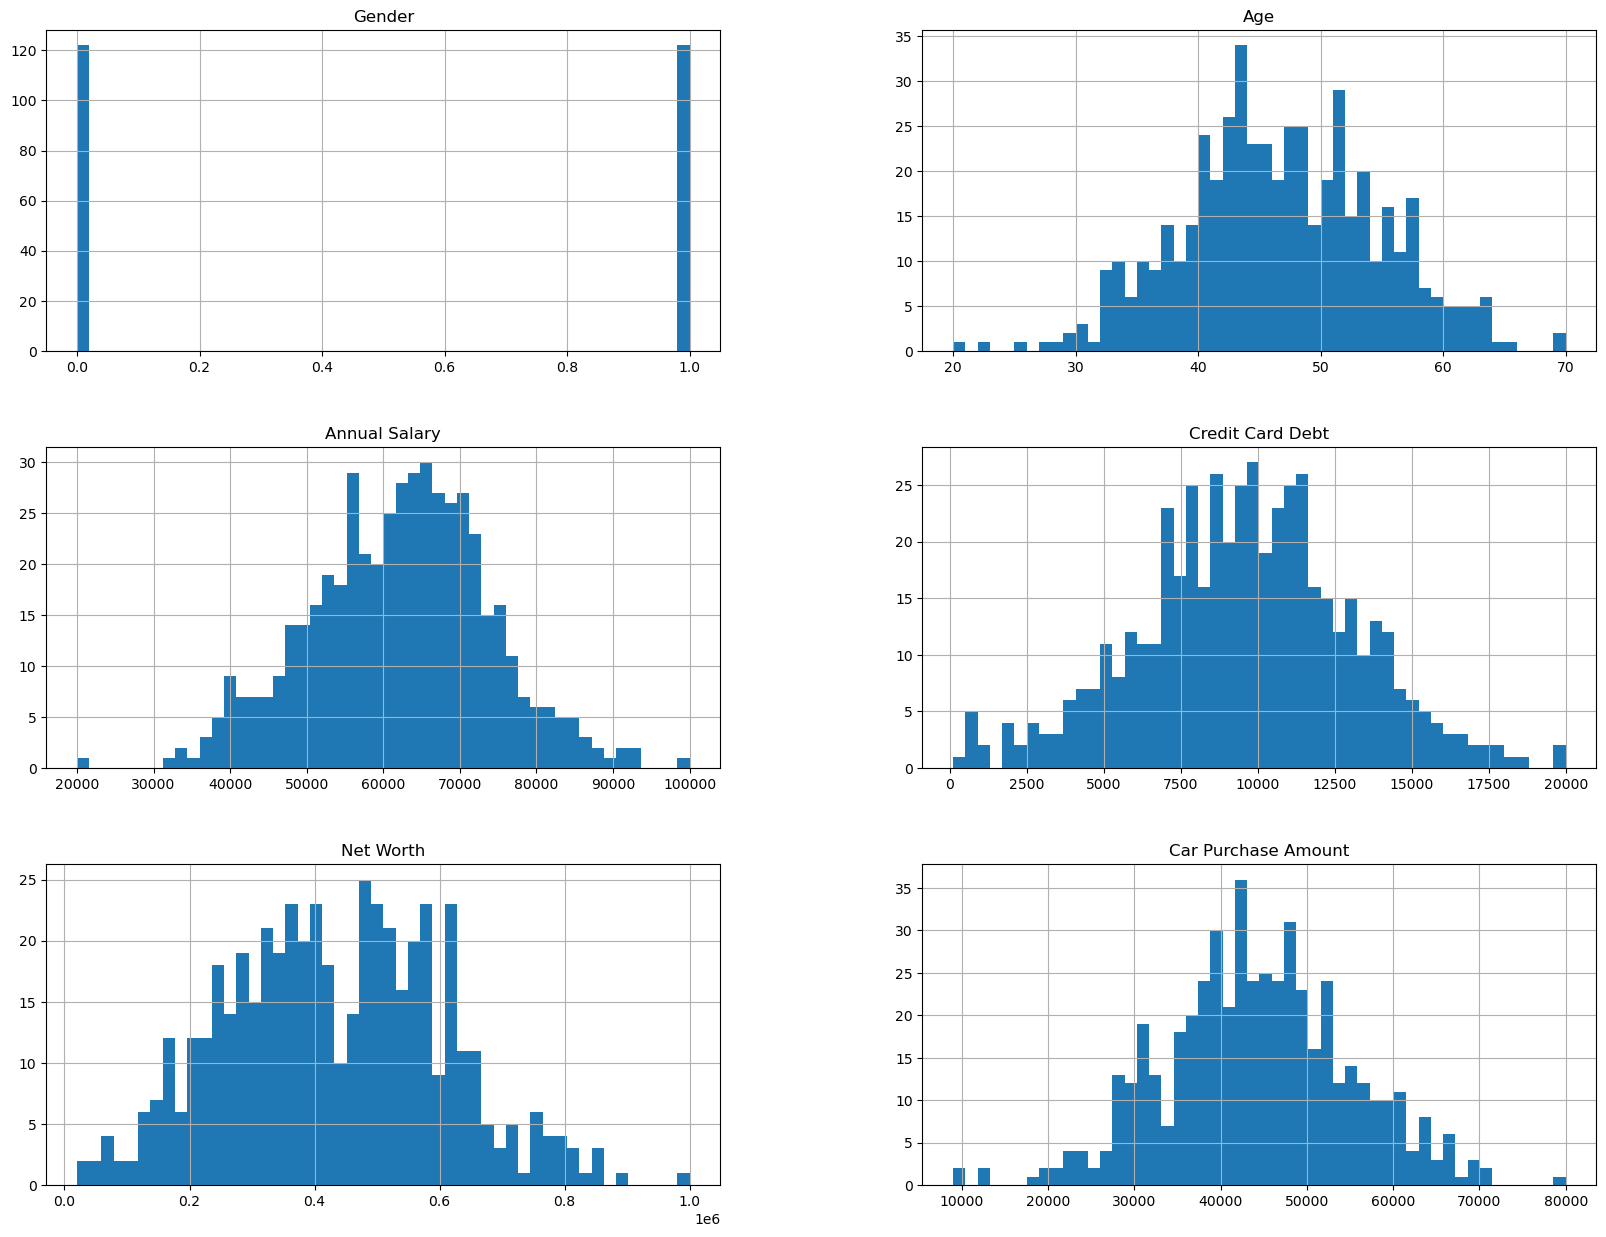

In [11]:
ds.hist(bins=50, figsize=(20,15))
plt.show()

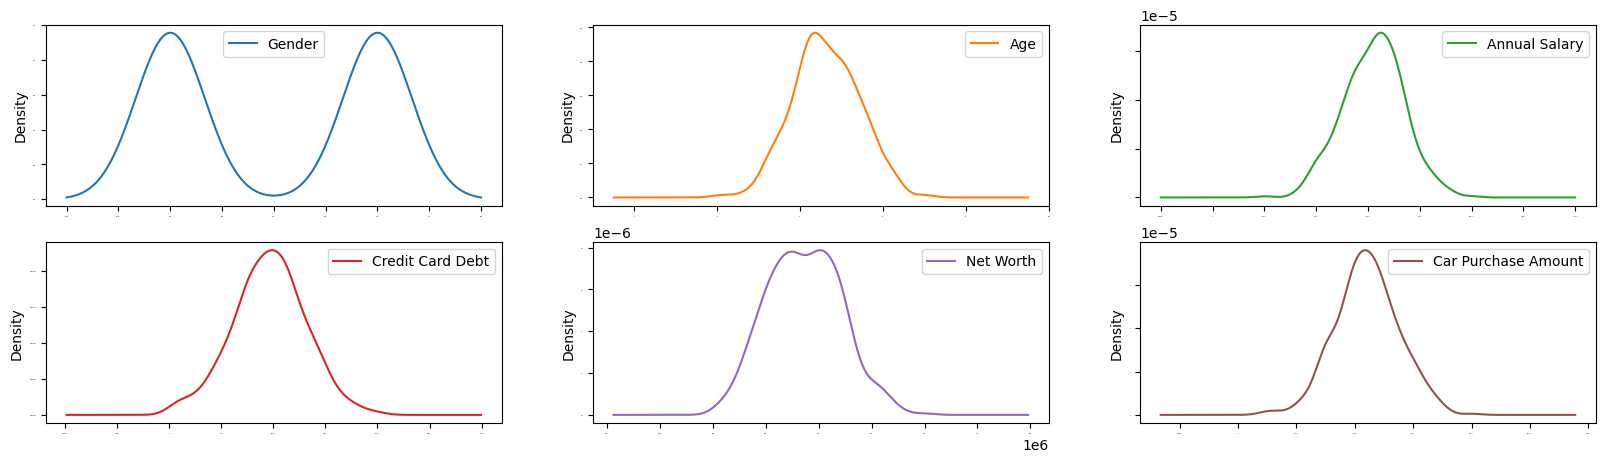

In [12]:
# Графики плотности
ds.plot(kind="density", subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(20,8))
plt.show()

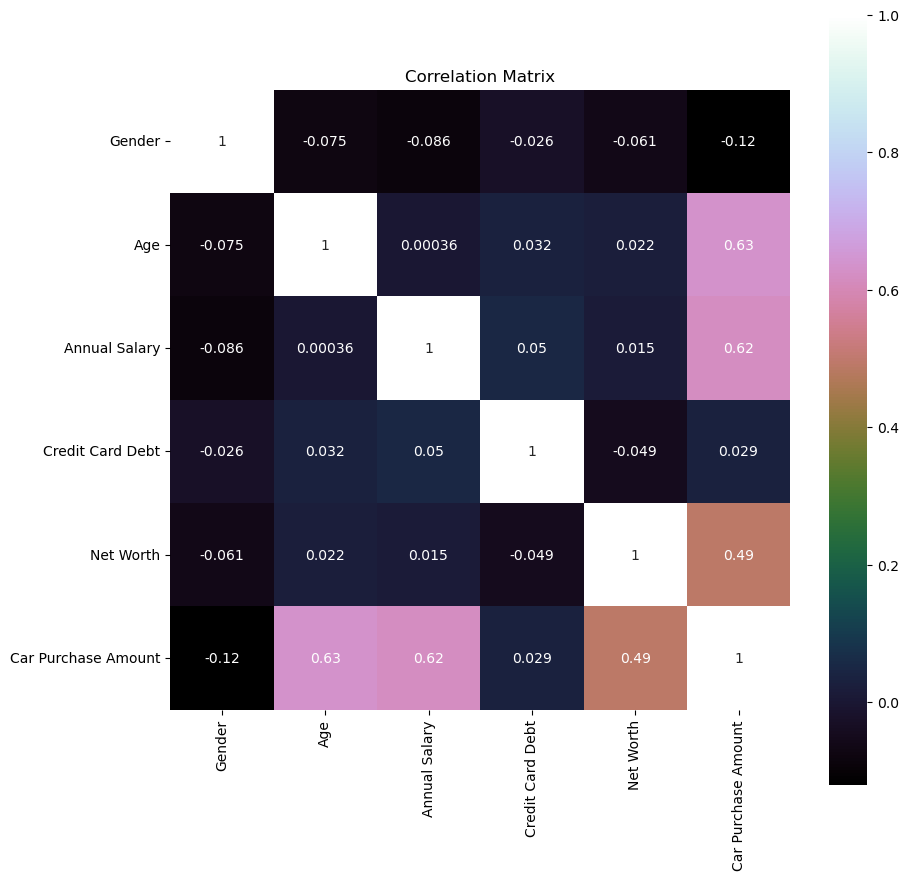

In [13]:
# Отделим только числовые признаки, построим график корреляции 
float_ds = ds.iloc[:, [3,4,5,6,7,8]]
corr=float_ds.corr()
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap="cubehelix")
plt.show()

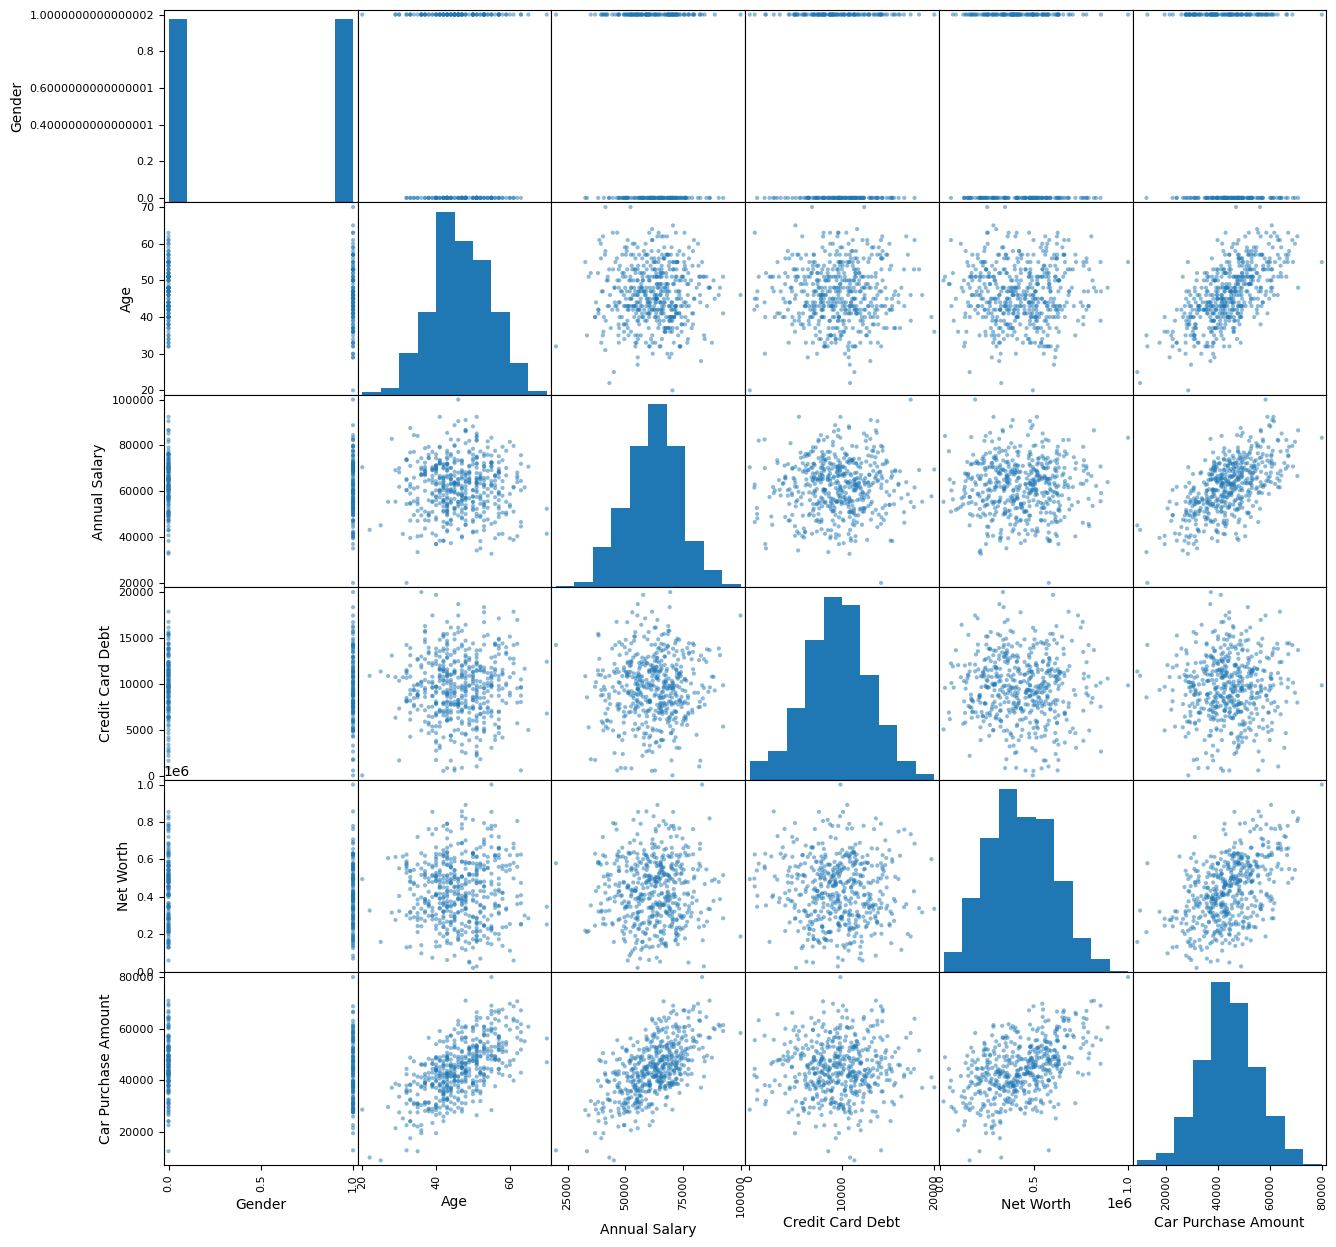

In [14]:
# Построим точечную диаграмму для комбинаций признаков
scatter_matrix(ds, figsize=(15,15))
plt.show()

In [15]:
# Корреляционная матрица
corr_m = float_ds.corr()
corr_m

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.075433,-0.086267,-0.026488,-0.061409,-0.120372
Age,-0.075433,1.000000,0.000361,0.031748,0.021794,0.633273
Annual Salary,-0.086267,0.000361,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,-0.026488,0.031748,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.061409,0.021794,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.120372,0.633273,0.617862,0.028882,0.488580,1.000000


In [16]:
# Корреляция признаков для стоимости ТС
corr_m["Car Purchase Amount"].sort_values(ascending=False)

Car Purchase Amount    1.000000
Age                    0.633273
Annual Salary          0.617862
Net Worth              0.488580
Credit Card Debt       0.028882
Gender                -0.120372
Name: Car Purchase Amount, dtype: float64

## Многомерные графики корреляции
Построим точечные графики для наиболее влияющих признаков

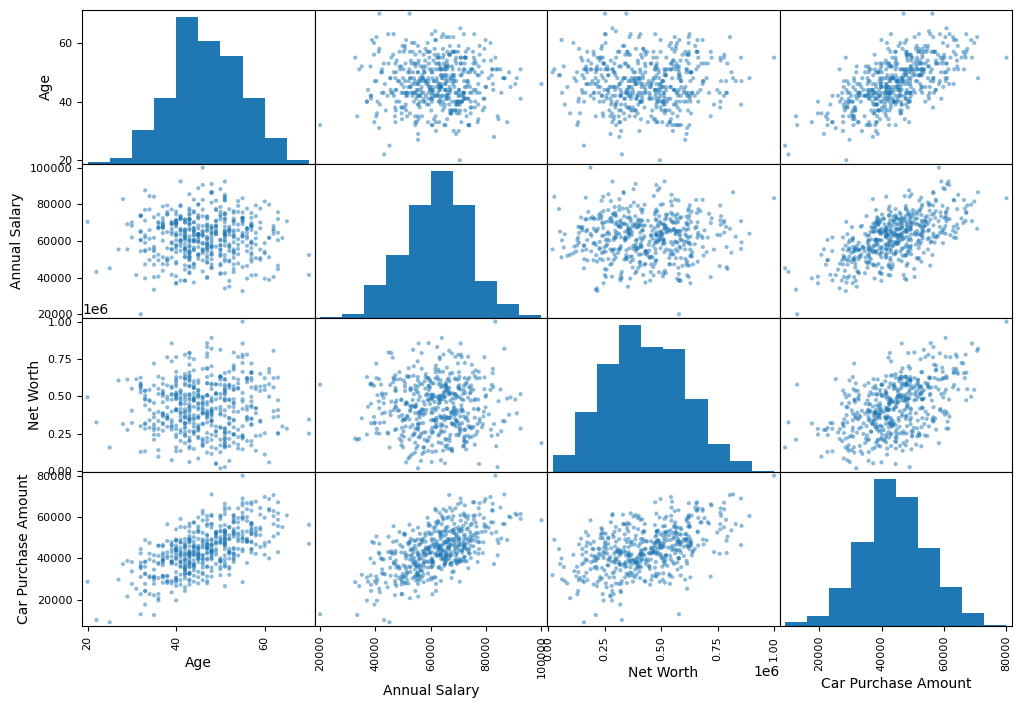

In [17]:
mvp=float_ds[["Age", "Annual Salary", "Net Worth", "Car Purchase Amount"]]
scatter_matrix(mvp, figsize=(12,8))
plt.show()

## Комбинирование атрибутов  
Скомбинируем несколько атрибутов и проверим возможную корреляцию

In [90]:
ds_copy = ds.copy()

ser = ds_copy["Credit Card Debt"] / ds_copy["Annual Salary"]

# Отношение долга к годовому доходу
ds_copy["Debt to Salary"] = ds_copy["Credit Card Debt"] / ds_copy["Annual Salary"]
# Отношение долга к общему имуществу
ds_copy["Debt to Net Worth"] = ds_copy["Credit Card Debt"] / ds_copy["Net Worth"]

target_column_label = "Car Purchase Amount"

cols = list(ds_copy.columns)
cols.remove(target_column_label)
cols.append(target_column_label)

ds_copy = ds_copy[cols]

corr_copy = ds_copy[["Debt to Salary", "Debt to Net Worth", "Car Purchase Amount"]].corr()
corr_copy["Car Purchase Amount"].sort_values(ascending=False)


Car Purchase Amount    1.000000
Debt to Net Worth     -0.231534
Debt to Salary        -0.284612
Name: Car Purchase Amount, dtype: float64

Как видно из корреляционной матрицы, доля долга относительно годового дохода и общего имущества влияет на стоимость покупки автомобиля сильнее, чем абсолютное значение долга. Сохраним эти признаки в сформированном наборе данных.

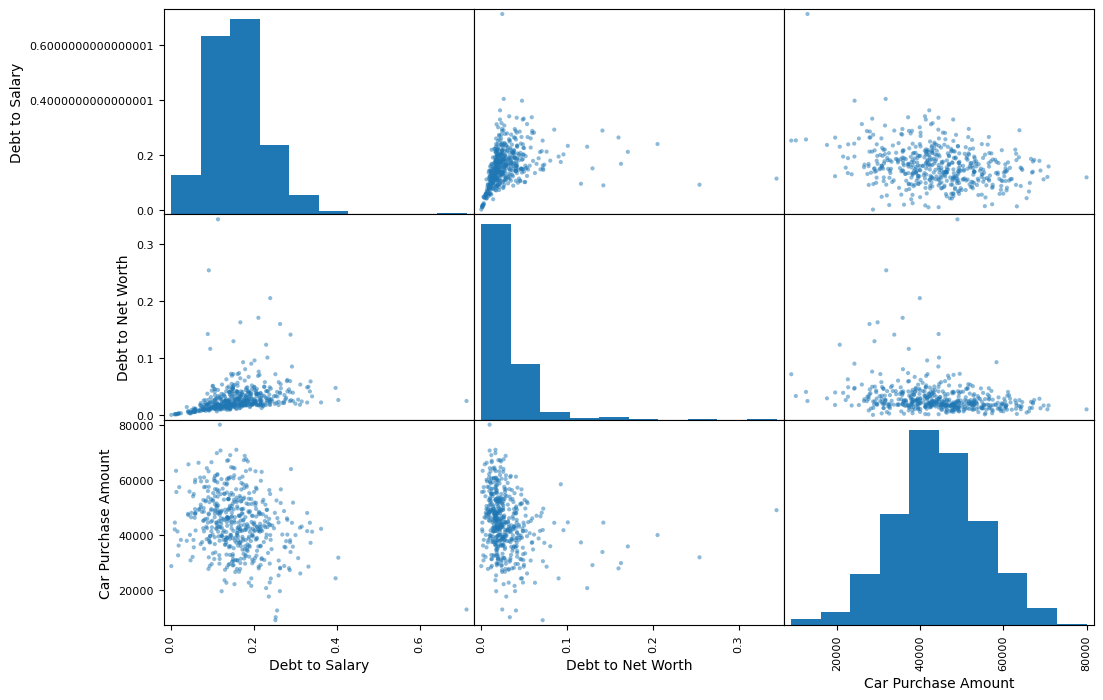

In [91]:
new=ds_copy[["Debt to Salary", "Debt to Net Worth", "Car Purchase Amount"]]
scatter_matrix(new, figsize=(12,8))
plt.show()

# Подготовка данных

## Заполнение NaN

В датасете есть признак с неопределенными значениями - Gender. Заполним недостающие значения средним значением

In [93]:
gender_mean = ds["Gender"].mean()
ds["Gender"] = ds["Gender"].fillna(gender_mean)
ds_copy["Gender"] = ds_copy["Gender"].fillna(gender_mean)
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    float64
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Debt to Salary       500 non-null    float64
 9   Debt to Net Worth    500 non-null    float64
 10  Car Purchase Amount  500 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 46.9+ KB


## Отбор существенных признаков

In [94]:
from sklearn.feature_selection import SelectKBest, f_regression

#Разделяем датасет на признаки и метки
x=ds_copy.iloc[:,3:11].drop(columns=["Car Purchase Amount"])
y=ds_copy["Car Purchase Amount"]

#Отбор признаков
bestfeatures = SelectKBest(f_regression, k=5)
fit = bestfeatures.fit(x, y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(x.columns)
featScores = pd.concat([columns, scores], axis=1)
featScores

,0,0
0,Gender,3.943593
1,Age,333.432989
2,Annual Salary,307.503396
3,Credit Card Debt,0.415776
4,Net Worth,156.153140
5,Debt to Salary,43.895741
6,Debt to Net Worth,28.209050


Удалим признак "Credit Card Debt"

In [95]:
ds = ds.drop(columns=["Credit Card Debt"])
ds_copy = ds_copy.drop(columns=["Credit Card Debt"])
ds_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    float64
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Net Worth            500 non-null    float64
 7   Debt to Salary       500 non-null    float64
 8   Debt to Net Worth    500 non-null    float64
 9   Car Purchase Amount  500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 43.0+ KB


## Преобразование данных

### Обработка текстовых и категориальных атрибутов

In [96]:
from sklearn.preprocessing import OrdinalEncoder

# преобразуем текстовые признаки 
cat_encoder = OrdinalEncoder()
text_columns = ds[["Customer Name", "Customer e-mail", "Country"]]
text_col_enc=cat_encoder.fit_transform(text_columns)
ds[["Customer Name", "Customer e-mail", "Country"]] = text_col_enc
ds[["Customer Name", "Customer e-mail", "Country"]]

cat_encoder = OrdinalEncoder()
text_columns = ds_copy[["Customer Name", "Customer e-mail", "Country"]]
ds_copy[["Customer Name", "Customer e-mail", "Country"]]=cat_encoder.fit_transform(text_columns)
ds_copy[["Customer Name", "Customer e-mail", "Country"]]

,Customer Name,Customer e-mail,Country
0,288.0,139.0,0.0
1,168.0,224.0,0.0
2,311.0,498.0,0.0
3,204.0,307.0,0.0
4,70.0,241.0,0.0
...,...,...,...
495,475.0,289.0,0.0
496,466.0,21.0,0.0
497,352.0,381.0,0.0
498,315.0,72.0,0.0


In [97]:
print(ds_copy["Country"].value_counts())
ds_copy[["Customer Name", "Customer e-mail", "Country", "Car Purchase Amount"]].corr()

Country
0.0    500
Name: count, dtype: int64


,Customer Name,Customer e-mail,Country,Car Purchase Amount
Customer Name,1.000000,-0.034360,NaN,0.031218
Customer e-mail,-0.034360,1.000000,NaN,0.003429
Country,NaN,NaN,NaN,NaN
Car Purchase Amount,0.031218,0.003429,NaN,1.000000


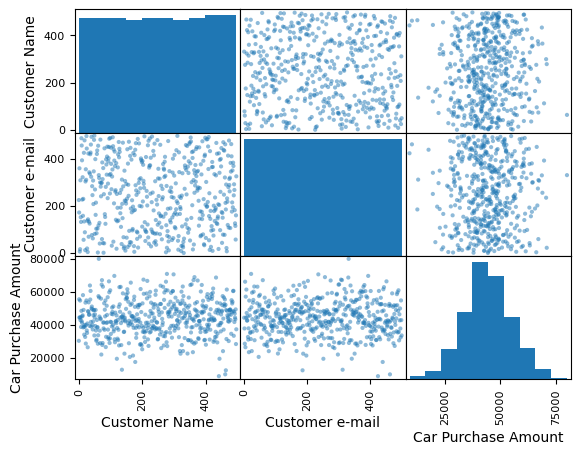

In [98]:
scatter_matrix(ds_copy[["Customer Name", "Customer e-mail", "Car Purchase Amount"]])
plt.show()

Признак Country содержит только одно значение, E-mail и Name представляются несущественными. Поэтому из преобразованного набора мы их удаляем.

In [99]:
ds_copy = ds_copy.drop(columns=["Customer Name", "Customer e-mail", "Country"])
ds_copy

,Gender,Age,Annual Salary,Net Worth,Debt to Salary,Debt to Net Worth,Car Purchase Amount
0,0.0,42,62812.09301,238961.2505,0.184827,0.048583,35321.45877
1,0.0,41,66646.89292,530973.9078,0.143637,0.018029,45115.52566
2,0.5,43,53798.55112,638467.1773,0.207447,0.017480,42925.70921
3,0.5,58,79370.03798,548599.0524,0.181758,0.026296,67422.36313
4,1.0,57,59729.15130,560304.0671,0.089717,0.009564,55915.46248
...,...,...,...,...,...,...,...
495,0.5,41,71942.40291,541670.1016,0.097243,0.012915,48901.44342
496,0.5,38,56039.49793,360419.0988,0.219514,0.034131,31491.41457
497,0.5,54,68888.77805,764531.3203,0.154040,0.013880,64147.28888
498,1.0,59,49811.99062,337826.6382,0.281319,0.041480,45442.15353


### Масштабирование

В этом разделе ранее подготовленные два набора данных будут будут преобразованы методом Min-max (по варианту) 

In [100]:
# скопируем два набора данных - исходный и сформированный
ds_transformed = ds.copy()

from sklearn.preprocessing import MinMaxScaler

# масштабируем первый набор
scaler1 = MinMaxScaler()
ds_transformed[ds_transformed.columns] = pd.DataFrame(scaler1.fit_transform(ds_transformed))
ds_transformed




,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Net Worth,Car Purchase Amount
0,0.579477,0.278557,0.0,0.0,0.44,0.535151,0.223430,0.370725
1,0.338028,0.448898,0.0,0.0,0.42,0.583086,0.521402,0.508669
2,0.625755,0.997996,0.0,0.5,0.46,0.422482,0.631089,0.477827
3,0.410463,0.615230,0.0,0.5,0.76,0.742125,0.539387,0.822850
4,0.140845,0.482966,0.0,1.0,0.74,0.496614,0.551331,0.660781
...,...,...,...,...,...,...,...,...
495,0.955734,0.579158,0.0,0.5,0.42,0.649280,0.532316,0.561992
496,0.937626,0.042084,0.0,0.5,0.36,0.450494,0.347366,0.316780
497,0.708249,0.763527,0.0,0.5,0.68,0.611110,0.759726,0.776722
498,0.633803,0.144289,0.0,1.0,0.78,0.372650,0.324313,0.513270


In [101]:
#масштабируем второй набор
ds_copy_transformed = ds_copy.copy()
scaler2 = MinMaxScaler()
ds_copy_transformed[ds_copy_transformed.columns] = pd.DataFrame(scaler2.fit_transform(ds_copy_transformed))
ds_copy_transformed

,Gender,Age,Annual Salary,Net Worth,Debt to Salary,Debt to Net Worth,Car Purchase Amount
0,0.0,0.44,0.535151,0.223430,0.257715,0.140683,0.370725
1,0.0,0.42,0.583086,0.521402,0.199836,0.051838,0.508669
2,0.5,0.46,0.422482,0.631089,0.289499,0.050241,0.477827
3,0.5,0.76,0.742125,0.539387,0.253402,0.075878,0.822850
4,1.0,0.74,0.496614,0.551331,0.124071,0.027223,0.660781
...,...,...,...,...,...,...,...
495,0.5,0.42,0.649280,0.532316,0.134646,0.036968,0.561992
496,0.5,0.36,0.450494,0.347366,0.306455,0.098660,0.316780
497,0.5,0.68,0.611110,0.759726,0.214454,0.039773,0.776722
498,1.0,0.78,0.372650,0.324313,0.393299,0.120029,0.513270


# Оценка моделей

У нас есть 4 набора данных: исходный, сформированный, преобразованный исходный, преобразованный сформированный. Разделим каждую из них на обучающую, валидационную и тестовую выборки.

## Разделение датасетов

In [102]:
from sklearn.model_selection import train_test_split

test_size = 0.2
val_size = 0.25
seed = 7

def split_dataset(dataset: pd.DataFrame):
    """Разделить датасет на тест, валидационную, обучающую"""

    # Выделим колонки с x и y
    y_col = "Car Purchase Amount"
    x_cols = dataset.columns.to_list()
    x_cols.remove(y_col)
    #print(x_cols, y_col)

    x = dataset[x_cols]
    y = dataset[y_col]   

    x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
    x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, test_size=val_size, random_state=seed)

    return (x_tr, y_tr, x_val, y_val, x_test, y_test)


# разделяем 4 датасета
ds_data = split_dataset(ds)
ds_copy_data = split_dataset(ds_copy)
ds_transformed_data = split_dataset(ds_transformed)
ds_copy_transformed_data = split_dataset(ds_copy_transformed)

print()


## Оценка моделей

In [117]:
#%pip install tensorflow

Протестируем подготовленные датасеты

In [118]:
import random
import keras
import tensorflow as tf
#from tensorflow import keras
from keras import layers
from keras import models
from keras import metrics
from keras import Input
from sklearn.metrics import mean_squared_error, r2_score

# устанавливаем seed для воспроизводимости рандомов между запусками
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


def unscale_target(x, y, scaler):
    df = x.copy()
    df["target"]=y
    data=scaler.inverse_transform(df)
    y_test=data[:,[-1]]
    return y_test


def test_dense_model(ds_data, scaler:MinMaxScaler=None):
    """Протестировать полносвязную нейросетевую регрессионную модель"""
    (x_tr, y_tr, x_val, y_val, x_test, y_test) = ds_data

    active1 = 'elu'
    active2 = 'linear'

    # собираем слои сети
    model = models.Sequential()
    print(f"input shape = {x_tr.shape[1]}")
    model.add(Input((x_tr.shape[1],)))
    model.add(layers.Dense(128, activation=active1))
    model.add(layers.Dense(256, activation=active1))
    model.add(layers.Dense(512, activation=active1))
    model.add(layers.Dense(256, activation=active1))
    model.add(layers.Dense(128, activation=active1))
    model.add(layers.Dense(64, activation=active1))
    # выходной слой - линейная функция активации, чтобы получить предсказание
    model.add(layers.Dense(1, activation=active2))

    # собираем модель
    model.compile(
        optimizer='adam', 
        loss='mse', 
        metrics=[metrics.RootMeanSquaredError()])
    
    callbacks = [
        # остановка обучения при отсутствии прогресса по СКО потерь
        keras.callbacks.EarlyStopping( 
            monitor="val_root_mean_squared_error",
            patience=25
        ),
        # уменьшение скорости обучения при отсутствии прогресса
        keras.callbacks.ReduceLROnPlateau(  
            monitor="val_loss",
            factor=0.25,
            patience=20
        )
    ]

    # обучаем модель
    m = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), callbacks=callbacks, epochs=250, batch_size=16, verbose=0)

    #test_loss, test_acc = model.evaluate(x_test, y_test)
    #print(f"test_loss={test_loss}, test_acc={test_acc}")

    y_tr_pred = model.predict(x_tr, verbose=0)
    y_val_pred = model.predict(x_val, verbose=0)

    if (scaler != None):
        # масштабируем цель для сравнения метрик с немасштабированными датасетами
        #todo unscale второго датасета нормально, а то неправильная колонка масштабируется
        y_tr_pred = unscale_target(x_tr, y_tr_pred, scaler)
        y_val_pred = unscale_target(x_val, y_val_pred, scaler)    
        y_tr = unscale_target(x_tr, y_tr, scaler)  
        y_val = unscale_target(x_val, y_val, scaler)    
        
    rmse = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
    r2 = r2_score(y_tr, y_tr_pred)
    print(f"tr rmse={rmse}")
    print(f"tr r2={r2}")

    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)
    print(f"val rmse={rmse}")
    print(f"val r2={r2}")
 
    #print(np.array(y_test).transpose())
    #print(np.array(y_test_pred))

    return rmse, r2



    
print("полносвязная сеть")
print("исходный преобразованный")
test_dense_model(ds_transformed_data, scaler1)
print("")
print("сформированный преобразованный")
test_dense_model(ds_copy_transformed_data, scaler2) 
print("")
print("исходный")
test_dense_model(ds_data)
print("")
print("сформированный")
test_dense_model(ds_copy_data)
print("")



полносвязная сеть
исходный преобразованный
input shape = 7


KeyboardInterrupt: 

In [ ]:
def test_GRU_model(ds_data, scaler:MinMaxScaler=None):
    """Протестировать GRU рекуррентную регрессионную модель"""
    (x_tr, y_tr, x_val, y_val, x_test, y_test) = ds_data

    active2 = 'linear'

    # собираем слои сети
    model = models.Sequential()
    print(f"input shape = {x_tr.shape[1]}")
    model.add(Input((x_tr.shape[1], 1)))
    model.add(layers.GRU(64, return_sequences=False))
    #model.add(layers.GRU(16, return_sequences=False))
    # выходной слой - линейная функция активации, чтобы получить предсказание
    model.add(layers.Dense(1, activation=active2))

    # собираем модель
    model.compile(
        optimizer='adam', 
        loss='mse', 
        metrics=[metrics.RootMeanSquaredError()])
    
    callbacks = [
        # остановка обучения при отсутствии прогресса по СКО потерь
        keras.callbacks.EarlyStopping( 
            monitor="val_root_mean_squared_error",
            patience=25
        ),
        # уменьшение скорости обучения при отсутствии прогресса
        keras.callbacks.ReduceLROnPlateau(  
            monitor="val_loss",
            factor=0.25,
            patience=20
        )
    ]


    # обучаем модель
    m = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), callbacks=callbacks, epochs=250, batch_size=16, verbose=0)

    #test_loss, test_acc = model.evaluate(x_test, y_test)
    #print(f"test_loss={test_loss}, test_acc={test_acc}")

    y_tr_pred = model.predict(x_tr, verbose=0)
    y_val_pred = model.predict(x_val, verbose=0)

    if (scaler != None):
        # масштабируем цель для сравнения метрик с немасштабированными датасетами
        y_tr_pred = unscale_target(x_tr, y_tr_pred, scaler)
        y_val_pred = unscale_target(x_val, y_val_pred, scaler)    
        y_tr = unscale_target(x_tr, y_tr, scaler)  
        y_val = unscale_target(x_val, y_val, scaler)    
        
    rmse = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
    r2 = r2_score(y_tr, y_tr_pred)
    print(f"tr rmse={rmse}")
    print(f"tr r2={r2}")

    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)
    print(f"val rmse={rmse}")
    print(f"val r2={r2}")
 
    #print(np.array(y_test).transpose())
    #print(np.array(y_test_pred))

    return rmse, r2


print("GRU рекуррентная сеть")
print("исходный преобразованный")
test_GRU_model(ds_transformed_data, scaler1)
print("")
print("сформированный преобразованный")
test_GRU_model(ds_copy_transformed_data, scaler2) 
print("")
print("исходный")
test_GRU_model(ds_data)
print("")
print("сформированный")
test_GRU_model(ds_copy_data)
print("") 

GRU рекуррентная сеть
исходный преобразованный
input shape = 7
tr rmse=363.996821538543
tr r2=0.9987963623055255
val rmse=431.7843761590578
val r2=0.9984496230160486

сформированный преобразованный
input shape = 6
tr rmse=579.0886705517099
tr r2=0.996953573292231
val rmse=610.7252704780775
val r2=0.9968983324511071

исходный
input shape = 7
tr rmse=45601.26629982623
tr r2=-17.890976288236477
val rmse=43780.941705668716
val r2=-14.939462150574496

сформированный
input shape = 6
tr rmse=45593.821327091166
tr r2=-17.884808419053268
val rmse=43773.53536694904
val r2=-14.934069709677052



Как видно из выводов двух предыдущих ячеек, лучшие показатели были достигнуты полносвязной сетью на сформированном преобразованном наборе данных и GRU рекуррентной сетью на исходном преобразованном наборе данных.

Выберем полносвязную модель и сформированный преобразованный датасет для дальнейшей обработки, поскольку он показал чуть более лучшие показатели на валидационной выборке.

### Проверка на тестовом наборе

In [ ]:
def test_dense_model_test(ds_data, scaler:MinMaxScaler=None):
    """Протестировать полносвязную нейросетевую регрессионную модель тестовой выборкой"""
    (x_tr, y_tr, x_val, y_val, x_test, y_test) = ds_data

    active1 = 'elu'
    active2 = 'linear'

    # собираем слои сети
    model = models.Sequential()
    print(f"input shape = {x_tr.shape[1]}")
    model.add(Input((x_tr.shape[1],)))
    model.add(layers.Dense(128, activation=active1))
    model.add(layers.Dense(256, activation=active1))
    model.add(layers.Dense(512, activation=active1))
    model.add(layers.Dense(256, activation=active1))
    model.add(layers.Dense(128, activation=active1))
    model.add(layers.Dense(64, activation=active1))
    # выходной слой - линейная функция активации, чтобы получить предсказание
    model.add(layers.Dense(1, activation=active2))

    # собираем модель
    model.compile(
        optimizer='adam', 
        loss='mse', 
        metrics=[metrics.RootMeanSquaredError()])
    
    callbacks = [
        # остановка обучения при отсутствии прогресса по СКО потерь
        keras.callbacks.EarlyStopping( 
            monitor="val_root_mean_squared_error",
            patience=25
        ),
        # уменьшение скорости обучения при отсутствии прогресса
        keras.callbacks.ReduceLROnPlateau(  
            monitor="val_loss",
            factor=0.25,
            patience=20
        )
    ]

    # обучаем модель
    m = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), callbacks=callbacks, epochs=250, batch_size=16, verbose=0)

    y_test_pred = model.predict(x_test, verbose=0)

    if (scaler != None):
        # масштабируем цель для сравнения метрик с немасштабированными датасетами
        y_test_pred = unscale_target(x_test, y_test_pred, scaler)
        y_test = unscale_target(x_test, y_test, scaler)  
        
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    print(f"test rmse={rmse}")
    print(f"test r2={r2}")

    return rmse, r2

test_dense_model_test(ds_copy_transformed_data, scaler2)

input shape = 6
test rmse=479.5186648387146
test r2=0.9981703980531519


(479.5186648387146, 0.9981703980531519)

### GRID подбор гиперпараметров

Будем подбирать следующие гиперпараметры:
1. Кол-во слоев
2. Функции активации

In [ ]:
def compile_grid():
    """Собрать сетку параметров для подбора"""
    # функции активации
    activation = ["elu", "leaky_relu"]
    # кол-во слоев
    layers = range(3, 9)
    # кол-во нейронов на выходе
    last_layer_units_num = 64

    grid = []

    # собираем сетку параметров для каждой активационной функции и кол-ва слоев
    for l_count in layers:
        for act in activation:
            layers_units = []
            # считаем сколько нейронов должно быть на каждом слое
            for i in range(l_count):
                power = -abs(int(l_count / 2) - i) + int(l_count / 2)
                #print(power)
                layers_units.insert(0, last_layer_units_num * (2**power))
            #print(layers_units)
            #print(act)
            setup = {"activation": act, "layers_units": layers_units}
            grid.append(setup)

    return grid



grid = compile_grid()
grid

[{'activation': 'elu', 'layers_units': [64, 128, 64]},
 {'activation': 'leaky_relu', 'layers_units': [64, 128, 64]},
 {'activation': 'elu', 'layers_units': [128, 256, 128, 64]},
 {'activation': 'leaky_relu', 'layers_units': [128, 256, 128, 64]},
 {'activation': 'elu', 'layers_units': [64, 128, 256, 128, 64]},
 {'activation': 'leaky_relu', 'layers_units': [64, 128, 256, 128, 64]},
 {'activation': 'elu', 'layers_units': [128, 256, 512, 256, 128, 64]},
 {'activation': 'leaky_relu', 'layers_units': [128, 256, 512, 256, 128, 64]},
 {'activation': 'elu', 'layers_units': [64, 128, 256, 512, 256, 128, 64]},
 {'activation': 'leaky_relu',
  'layers_units': [64, 128, 256, 512, 256, 128, 64]},
 {'activation': 'elu',
  'layers_units': [128, 256, 512, 1024, 512, 256, 128, 64]},
 {'activation': 'leaky_relu',
  'layers_units': [128, 256, 512, 1024, 512, 256, 128, 64]}]

1.
input shape = 6
{'activation': 'elu', 'layers_units': [64, 128, 64]}
tr rmse=405.93985609159944
tr r2=0.9985029924720531
val rmse=463.24370245277004
val r2=0.9982154755063022

2.
input shape = 6
{'activation': 'leaky_relu', 'layers_units': [64, 128, 64]}
tr rmse=224.2198299647912
tr r2=0.9995432814668168
val rmse=355.1121930684456
val r2=0.9989513401655749

3.
input shape = 6
{'activation': 'elu', 'layers_units': [128, 256, 128, 64]}
tr rmse=297.90813767093715
tr r2=0.9991937581629119
val rmse=335.9479530800162
val r2=0.999061471503095

4.
input shape = 6
{'activation': 'leaky_relu', 'layers_units': [128, 256, 128, 64]}
tr rmse=230.68504426257718
tr r2=0.9995165634565519
val rmse=424.34397915859216
val r2=0.9985025940506627

5.
input shape = 6
{'activation': 'elu', 'layers_units': [64, 128, 256, 128, 64]}
tr rmse=319.8505346654222
tr r2=0.9990706169245781
val rmse=360.28865979083196
val r2=0.9989205447304237

6.
input shape = 6
{'activation': 'leaky_relu', 'layers_units': [64, 128, 

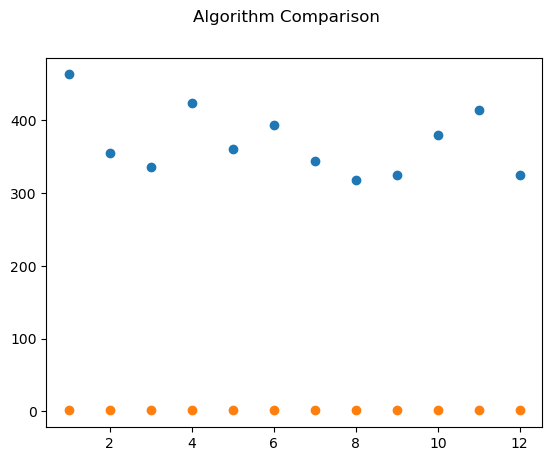

In [ ]:
# для каждой настройки запустим обучение

def test_dense_grid_model(ds_data, grid_params, scaler:MinMaxScaler=None, ):
    """Протестировать полносвязную нейросетевую регрессионную модель с учетом параметров"""
    (x_tr, y_tr, x_val, y_val, x_test, y_test) = ds_data

    active1 = grid_params["activation"]
    active2 = 'linear'
    layers_units = grid_params["layers_units"]

    # собираем слои сети
    model = models.Sequential()
    print(f"input shape = {x_tr.shape[1]}")
    model.add(Input((x_tr.shape[1],)))

    # добавляем заданное параметрами кол-во слоев 
    for units in layers_units:
        model.add(layers.Dense(units, activation=active1))

    # выходной слой - линейная функция активации, чтобы получить предсказание
    model.add(layers.Dense(1, activation=active2))

    # собираем модель
    model.compile(
        optimizer='adam', 
        loss='mse', 
        metrics=[metrics.RootMeanSquaredError()])
    
    callbacks = [
        # остановка обучения при отсутствии прогресса по СКО потерь
        keras.callbacks.EarlyStopping( 
            monitor="val_root_mean_squared_error",
            patience=25
        ),
        # уменьшение скорости обучения при отсутствии прогресса
        keras.callbacks.ReduceLROnPlateau(  
            monitor="val_loss",
            factor=0.25,
            patience=20
        )
    ]

    # обучаем модель
    m = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), callbacks=callbacks, epochs=250, batch_size=16, verbose=0)

    #test_loss, test_acc = model.evaluate(x_test, y_test)
    #print(f"test_loss={test_loss}, test_acc={test_acc}")

    y_tr_pred = model.predict(x_tr, verbose=0)
    y_val_pred = model.predict(x_val, verbose=0)

    if (scaler != None):
        # масштабируем цель для сравнения метрик с немасштабированными датасетами
        y_tr_pred = unscale_target(x_tr, y_tr_pred, scaler)
        y_val_pred = unscale_target(x_val, y_val_pred, scaler)    
        y_tr = unscale_target(x_tr, y_tr, scaler)  
        y_val = unscale_target(x_val, y_val, scaler)  

    print(grid_params)  
        
    rmse = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
    r2 = r2_score(y_tr, y_tr_pred)
    print(f"tr rmse={rmse}")
    print(f"tr r2={r2}")

    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)
    print(f"val rmse={rmse}")
    print(f"val r2={r2}")
 
    #print(np.array(y_test).transpose())
    #print(np.array(y_test_pred))

    return rmse, r2

rmse_list = []
r2_list = []
names = []

for i, p in enumerate(grid):
    print(f"{i+1}.")
    rmse, r2 = test_dense_grid_model(ds_copy_transformed_data, p, scaler2)
    rmse_list.append(rmse)
    r2_list.append(r2)
    names.append(i+1)
    print()
    #break

plt.plot(names, rmse_list, 'o')
plt.plot(names, r2_list, 'o')
plt.suptitle("Algorithm Comparison")
plt.show()

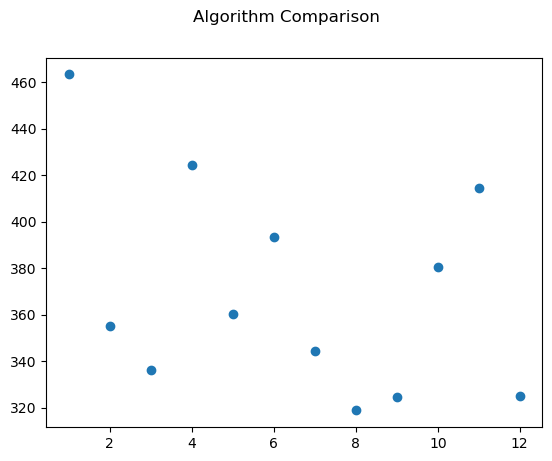

In [ ]:
plt.plot(names, rmse_list, 'o')
plt.suptitle("Algorithm Comparison")
plt.show()

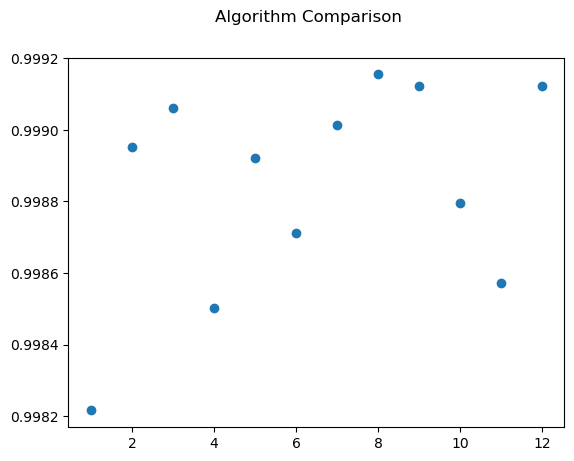

In [ ]:
plt.plot(names, r2_list, 'o')
plt.suptitle("Algorithm Comparison")
plt.show()

В ходе подбора гиперпараметров лучших показателей на валидационной выборке достигла модель:

{'activation': 'leaky_relu', 'layers_units': [128, 256, 512, 256, 128, 64]}

Показав лучший rmse и r2. Проверим качество на тестовом наборе.

In [ ]:
def test_dense_model_test_grid(ds_data, scaler:MinMaxScaler=None):
    """Протестировать полносвязную нейросетевую регрессионную модель тестовой выборкой"""
    (x_tr, y_tr, x_val, y_val, x_test, y_test) = ds_data

    active1 = 'leaky_relu'
    active2 = 'linear'

    # собираем слои сети
    model = models.Sequential()
    print(f"input shape = {x_tr.shape[1]}")
    model.add(Input((x_tr.shape[1],)))
    model.add(layers.Dense(128, activation=active1))
    model.add(layers.Dense(256, activation=active1))
    model.add(layers.Dense(512, activation=active1))
    model.add(layers.Dense(256, activation=active1))
    model.add(layers.Dense(128, activation=active1))
    model.add(layers.Dense(64, activation=active1))
    # выходной слой - линейная функция активации, чтобы получить предсказание
    model.add(layers.Dense(1, activation=active2))

    # собираем модель
    model.compile(
        optimizer='adam', 
        loss='mse', 
        metrics=[metrics.RootMeanSquaredError()])
    
    callbacks = [
        # остановка обучения при отсутствии прогресса по СКО потерь
        keras.callbacks.EarlyStopping( 
            monitor="val_root_mean_squared_error",
            patience=25
        ),
        # уменьшение скорости обучения при отсутствии прогресса
        keras.callbacks.ReduceLROnPlateau(  
            monitor="val_loss",
            factor=0.25,
            patience=20
        )
    ]

    # обучаем модель
    m = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), callbacks=callbacks, epochs=250, batch_size=16, verbose=0)

    y_test_pred = model.predict(x_test, verbose=0)

    if (scaler != None):
        # масштабируем цель для сравнения метрик с немасштабированными датасетами
        y_test_pred = unscale_target(x_test, y_test_pred, scaler)
        y_test = unscale_target(x_test, y_test, scaler)  
        
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    print(f"test rmse={rmse}")
    print(f"test r2={r2}")

    return rmse, r2

test_dense_model_test_grid(ds_copy_transformed_data, scaler2)

input shape = 6
test rmse=403.5810255032727
test r2=0.9987039938569547


(403.5810255032727, 0.9987039938569547)

Как видно из вывода, с помощью подбора гиперпараметров удалось найти более точную модель для предсказании на тестовом датасете - показатели улучшились.

# Выводы

В ходе выполнения лабораторной работы разработана модель для прогнозирования общей суммы, которую клиенты готовы заплатить за автомобиль.

Выполнена очистка и подготовка данных: отбор существенных признаков, масштабирование данных. Произведено сравнение моделей, использующих разные типы нейросетей и обученные на разных датасетах.

В качестве лучшей модели выбрана полносвязная нейронная сеть, обученная на сформированном масштабированном наборе данных.

Для выбранного типа модели произведен поиск гиперпараметров по сетке. После применения выбранных гиперпараметров модель показала улучшение качества предсказаний на тестовом наборе данных, что показало полезность подбора гиперпараметров.